<a href="https://colab.research.google.com/github/acastellanos-ie/ML2-MBD-EN-OCT-2021-S-1/blob/main/pca_lda_practice/practice_proposal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab Configuration

**Execute this steps to configure the Google Colab environment in order to execute this notebook. It is not required if you are executing it locally and you have properly configured your local environment according to what explained in the Github Repository.**

The first step is to clone the repository to have access to all the data and files.

In [ ]:
repository_name = "ML2-MBD-EN-OCT-2021-S-1"
repository_url = 'https://github.com/acastellanos-ie/' + repository_name

In [ ]:
! git clone $repository_url

Install the requirements

In [ ]:
! pip install -Uqqr $repository_name/requirements.txt

Everything is set up properly! You can now move on to the practice code.

I do recommend you to restart the environment at this point to ensure that Google Colab is aware of the installed packages and their configuration (see image below).

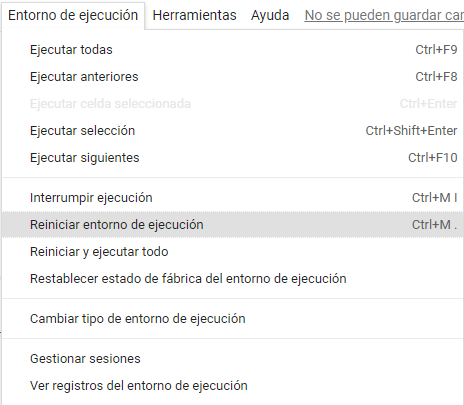

# PCA/LDA Practice

Go to the practice directory



In [ ]:
%cd $repository_name/pca_lda_practice

The following code includes some imports and configuration steps for better visualization

In [ ]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>")) # Increase cell width
display(HTML("<style>.rendered_html { font-size: 16px; }</style>")) # Increase font size

# Larger figures

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore') # Do not print warning messages

In [ ]:
import pandas as pd
import numpy as np

# Introduction

For this practice we are going to use the Breast Cancer Wisconsin data set from the [*UCI Machine learning repo*](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) and try to detect whether a breast cancer cell is benign or malignant.

The dataset includes  569 observations and 32 variables measuring the size and shape of cell nuclei. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image.

In more detail, the diagnosis, a categorical variable, is our response variable and the 30 measurement variables, all of which are continuous, are our potential explanatory variables for our model.
These 30 measurement variables are actually only 10 different features of the nucleus, but with 3 different measurements of each: mean, standard error and the ‘worst’ or largest (mean of the three largest values).

The features included are:

* **radius** - mean of distances from center to points on the perimeter
* **texture** - standard deviation of gray-scale values
* **perimeter**
* **area**
* **smoothness** - local variation in radius lengths
* **compactness** - perimeter^2 / area - 1.0
* **concavity** - severity of concave portions of the contour
* **concave points** - number of concave portions of the contour
* **symmetry** 
* **fractal dimension** - "coastline approximation" - 1

# Data Loading

We load the dataset from the CSV file

In [ ]:
original_dataset = pd.read_csv("./data/data.csv") # We keep the original dataset for comparison
dataset = original_dataset

dataset.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


As we discussed in class, you need to standardize the data since before applying PCA. PCA's output is influenced based on the scale of the features of the data.

To apply normalization, you will import the `StandardScaler` module from the sklearn library and then apply scaling by doing `fit_transform` on the feature data.

While applying `StandardScaler`, each feature of your data should be normally distributed such that it will scale the distribution to a mean of zero and a standard deviation of one.

In [ ]:
from sklearn.preprocessing import StandardScaler
X = dataset.iloc[:,2:32].values # We do not take the class label
dataset.iloc[:,2:32] = StandardScaler().fit_transform(X) # normalizing the features

dataset.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,NaN
1,842517,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,NaN
2,84300903,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,NaN
3,84348301,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,NaN
4,84358402,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,NaN


# Exercise #1: Principal Components Analysis (FUNDAMENTAL)

*Why PCA?*

We will try to reduce the dimensionality of the dataset by applying PCA. There are thirty variables that can be combined using PCA into different linear combinations that each explain a part of the variance of the model.

If we take a look to the correlation matrix, we can see that there are large correlations between some variables (i.e., we expected that behavior since we have 3 different measures for the same phenomena). Since PCA relies in these correlations, it is reasonable to expect that it is going to be able to find a better representation of the data.

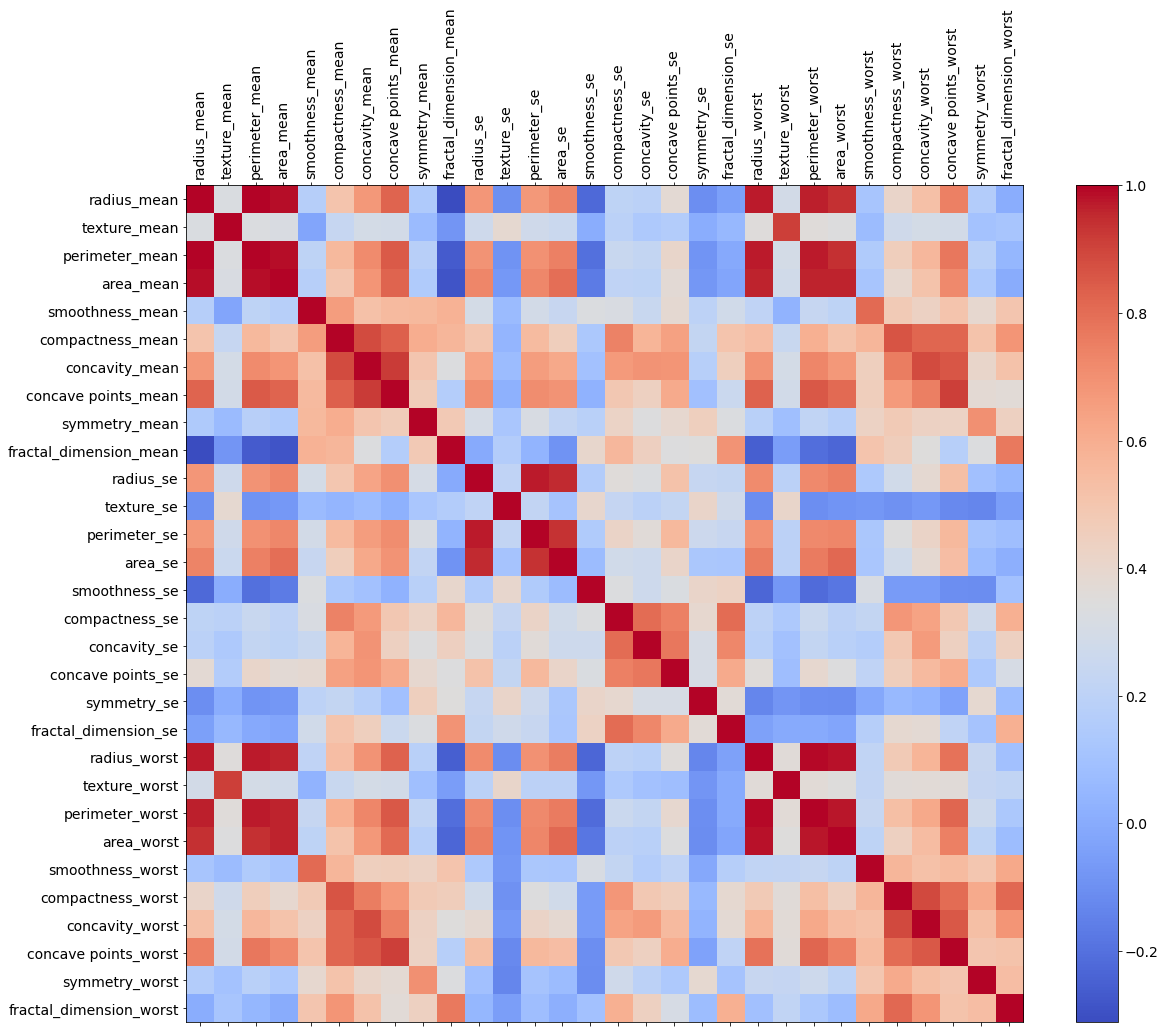

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(dataset.iloc[:,2:32].corr(), fignum=f.number, cmap=plt.cm.coolwarm)
plt.xticks(range(dataset.iloc[:,2:32].shape[1]), dataset.iloc[:,2:32].columns, fontsize=14, rotation=90)
plt.yticks(range(dataset.iloc[:,2:32].shape[1]), dataset.iloc[:,2:32].columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

As the correlation matrix shows some correlations between the features, let's compute the Principal Components of the dataset 

In [ ]:
from sklearn.decomposition import PCA

# Your code here

Once you have the principal components, you can find the explained_variance_ratio. It will provide you with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace. 

Take a look to the `explained_variance_ratio_` of the object generated by PCA

In [ ]:
# Your code here

## Principal Component Selection

Based on the Cumulative Proportion of Variance Explained, decide how many principal components you want to select (i.e., you should choose a small number of PC that can explain most of the variance).

Extract the N-principal components (being N the number of coefficients that you have decided). 

In [ ]:
# Your code here

# Exercise #2: Linear Discriminant Analysis (LDA) (FUNDAMENTAL)

From the principal component’s scatter plots it is evident that there is some clustering of benign and malignant points. This suggests that we could build a linear discriminant function using these principal components. 

### Model building and validation

Split the dataset into training/test data

In [ ]:
from sklearn.model_selection import train_test_split

# Your code here

Calculate the linear discriminant function by using the `LinearDiscriminantAnalysis` function of the `sklearn` package: (https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import plot_confusion_matrix, accuracy_score

# Your code here

### Model Comparison

Compare the PCA-based model to a model including all the features.

In [ ]:
# Your code here

As can be seen in the graph, the optimal number of PCs to select will be 19, achieving a performance of more than 97% of accuracy.

# Exercise #3: LDA for Multiclass Classification (ADVANCED)

Let's apply LDA to a more challenging scenario: recognize handwritten digits. This is a now classical example since most of the introductory Deep Learning tutorials use it. However, I will prove you that a simpler LDA classifier is able to do the job. 

sklearn includes the a dataset of [handwritten digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) that we will use for the experimentation. Let's load it and take a look at the digits.

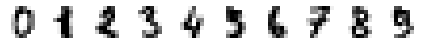

In [ ]:
from sklearn import datasets, svm, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

digits = datasets.load_digits()

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.tight_layout()

The images are just 8x8 pixels but they contain enough information to recognize the digits

Now it is up to you to split the dataset into training and test and train an LDA classifier (for this example we will not focus on PCA, although if you want to try it, fell free!) and check its performance. 

In [ ]:
# Your code here